In [3]:
import pandas as pd
import networkx as nx
df = pd.read_csv("./Data/Test data better.csv", header=1) #reads csv file
authors_by_papers = df["Authors Affiliations"].values.tolist() #converts author affiliations column file to list
authors_seperated = [author_list.split('; ') for author_list in authors_by_papers] #seperates authors into nested list
author_edge_list=[(authorx,authory) for author_list in authors_seperated for authorx in author_list for authory in author_list if authorx!=authory and len(author_list)<=20] #creates tuples for each nested list

G=nx.Graph()
G.add_edges_from(author_edge_list)
G.number_of_edges()

959

In [10]:
import networkx as nx
MG=nx.MultiGraph()
MG.add_edges_from(author_edge_list)

from collections import Counter
c = Counter (MG.edges())

for u,v,d in MG.edges(data=True):
    d['weight']=c[u, v]/2


In [7]:
pip install netwulf
import networkx as nx
G=nx.Graph()
G.add_edges_from(author_edge_list)
H= nx.barabasi_albert_graph(100,m=1)
visualize(H)

SyntaxError: invalid syntax (<ipython-input-7-2aad2083a2ea>, line 1)

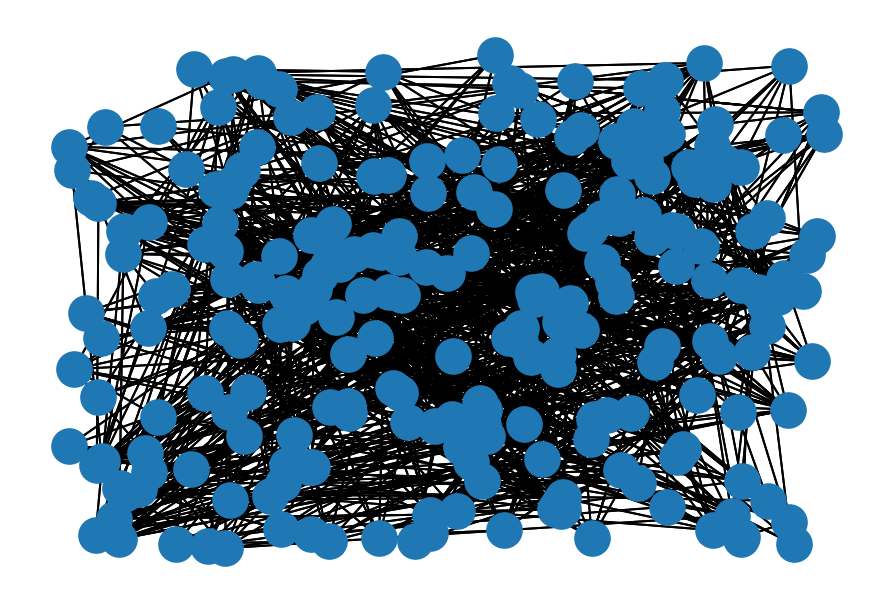

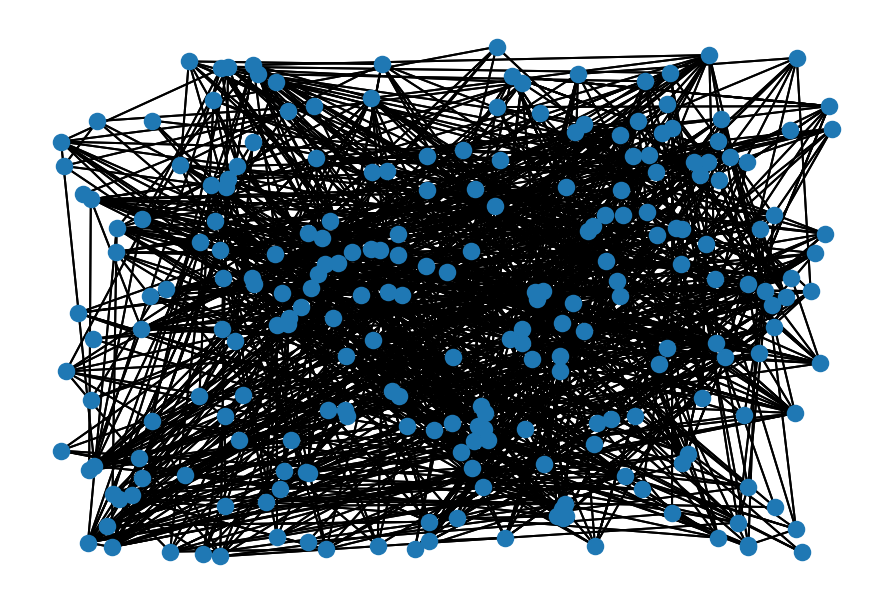

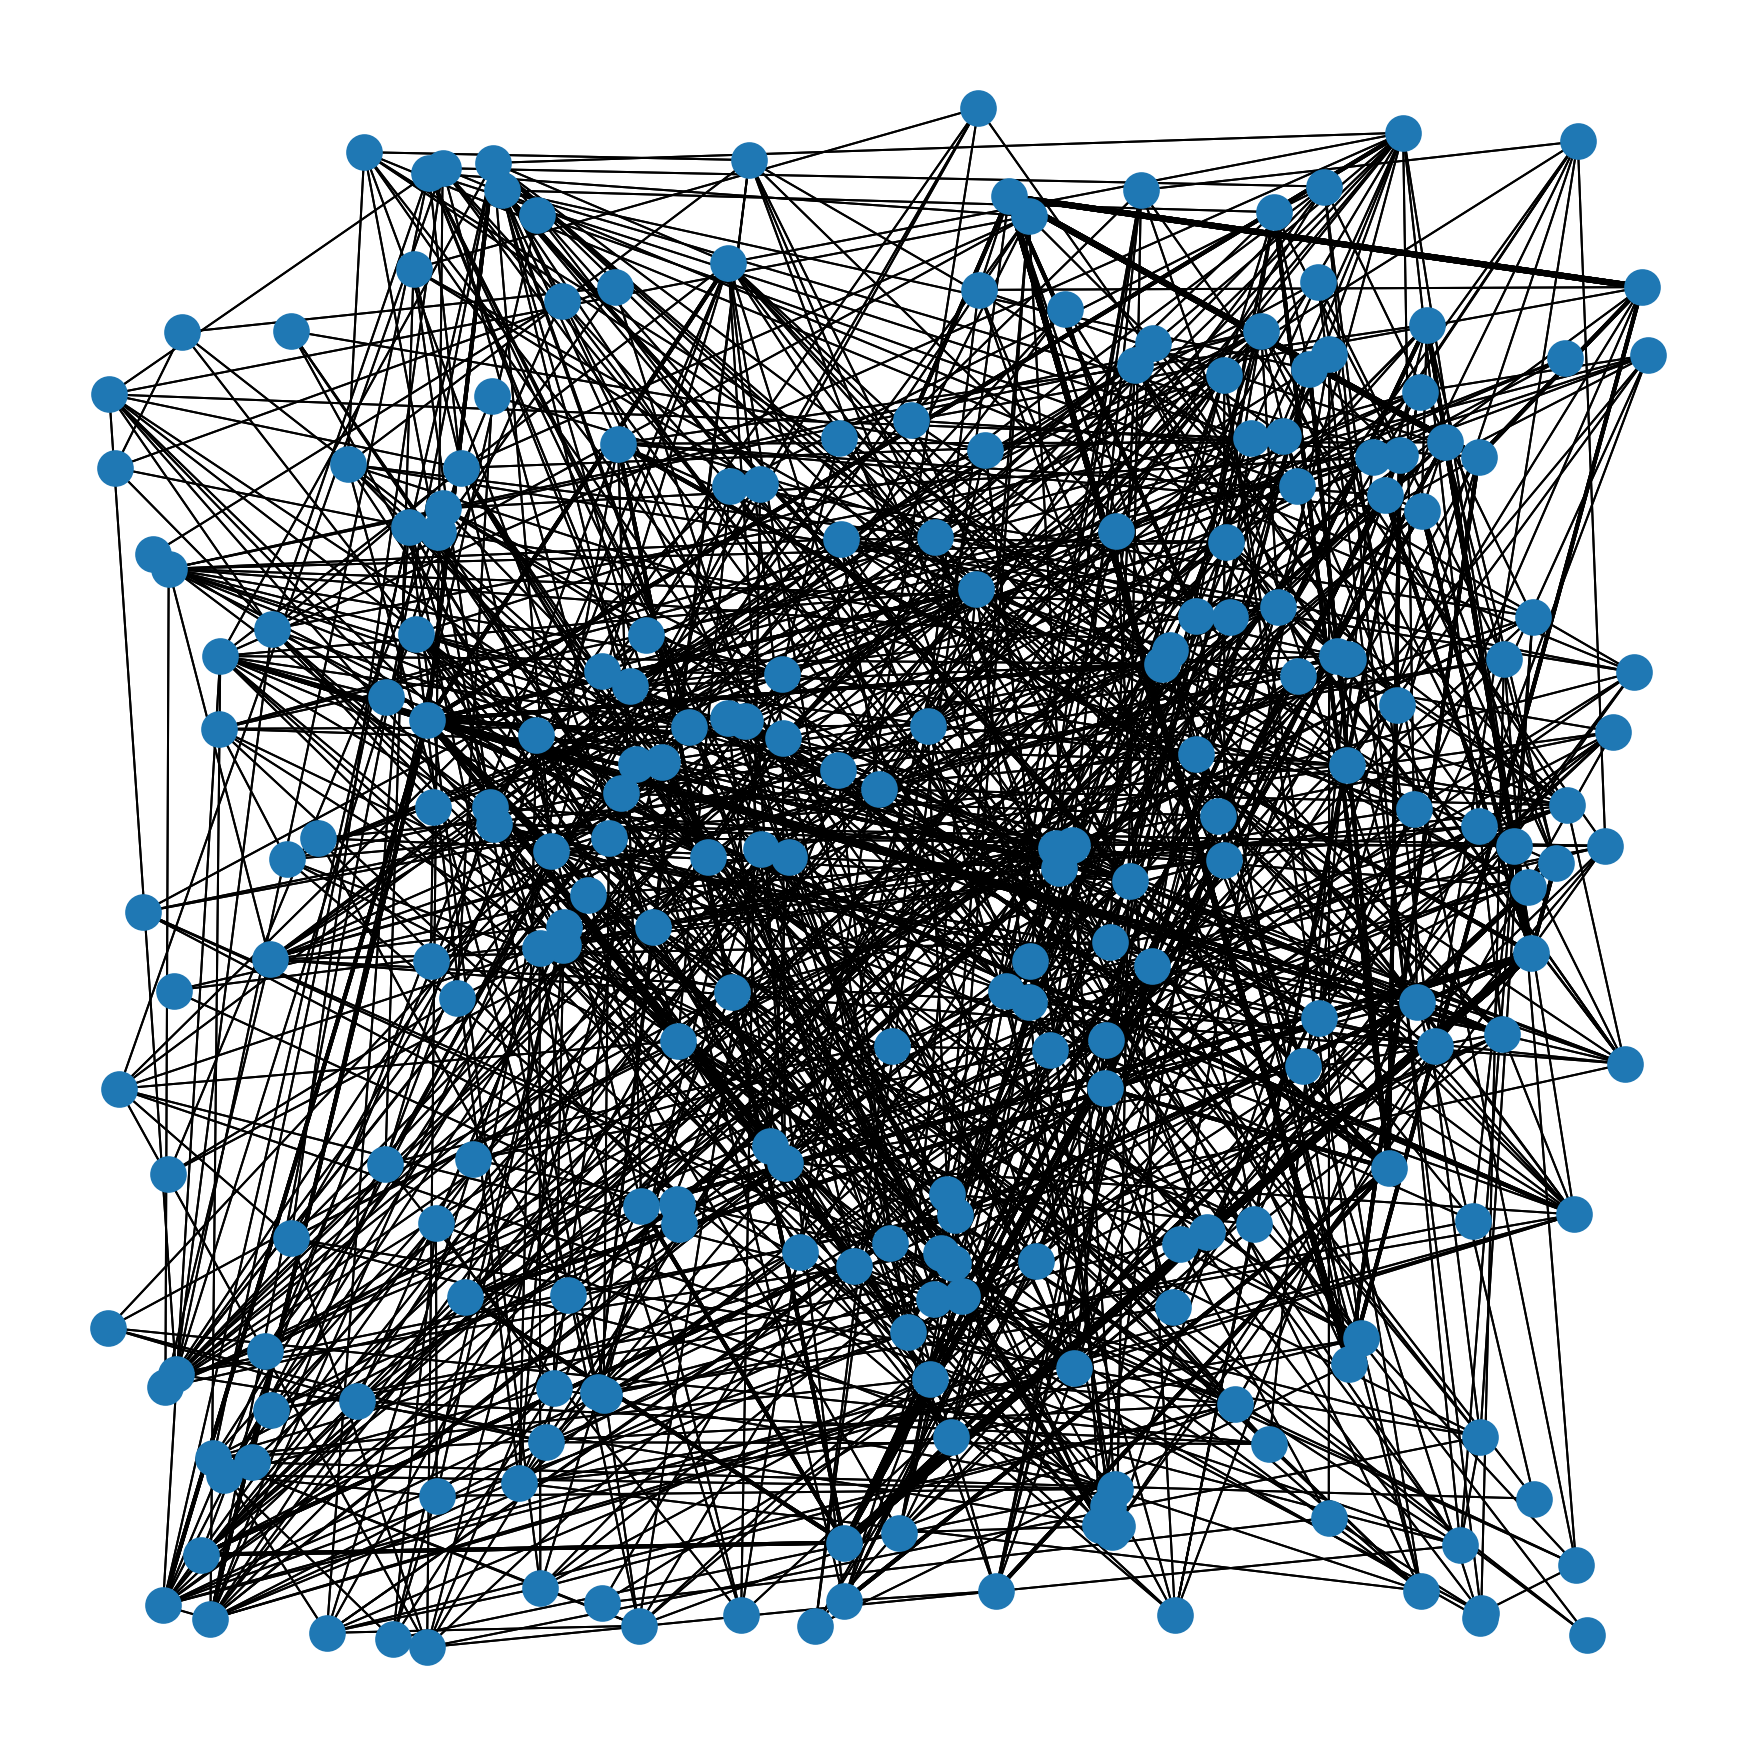

In [14]:
import matplotlib
import matplotlib.pyplot as plt
pos = nx.random_layout(G)
# default
plt.figure(1)
nx.draw(MG,pos)
# smaller nodes and fonts
plt.figure(2)
nx.draw(MG,pos,node_size=60,font_size=8) 
# larger figure size
plt.figure(3,figsize=(12,12)) 
nx.draw(MG,pos, width=[d['weight'] for _, _, d in MG.edges(data=True)])
plt.show()

In [ ]:

import numpy.linalg

L = nx.normalized_laplacian_matrix(G)
e = numpy.linalg.eigvals(L.A)
print("Largest eigenvalue:", max(e))
print("Smallest eigenvalue:", min(e))
plt.hist(e, bins=100)  # histogram with 100 bins
plt.xlim(0, 2)  # eigenvalues between 0 and 2
plt.show()